## Step 1: Load and Explore the Dataset

We begin by importing the McDonald's customer perception dataset, which includes variables like how customers perceive McDonald's (e.g., "yummy", "cheap") and demographic data (e.g., age, gender, visit frequency). We'll explore the structure and size of the data before moving to segmentation.


In [1]:
from google.colab import files
uploaded = files.upload()

Saving McDonalds Case Study-20250522T161445Z-1-001.zip to McDonalds Case Study-20250522T161445Z-1-001.zip


In [ ]:
import zipfile
import os

# Use the correct filename of the ZIP you uploaded
with zipfile.ZipFile('McDonalds Case Study-20250522T161445Z-1-001.zip') as zip_ref:
    zip_ref.extractall()

# List all files to find the Excel file inside
print("Extracted files:", os.listdir())


Extracted files: ['.config', 'McDonalds Case Study', 'McDonalds Case Study-20250522T161445Z-1-001.zip', 'sample_data']


In [ ]:
import os
print(os.listdir())



['.config', 'McDonalds Case Study', 'McDonalds Case Study-20250522T161445Z-1-001.zip', 'sample_data']


In [ ]:
import os
print(os.listdir("McDonalds Case Study"))


['mcdonalds.csv']


**Step 2: Convert Perception Data to Binary Format**

We select the first 11 perception-related columns and convert 'Yes' responses to 1 and 'No' to 0. This transformation is required to perform cluster analysis on binary (0/1) data.

In [ ]:
import pandas as pd

# Load the CSV file from inside the folder
df = pd.read_csv("McDonalds Case Study/mcdonalds.csv")

# Replicating the R code from page 271
print("Column names:\n", df.columns.tolist())
print("\nShape of dataset:", df.shape)
print("\nFirst 3 rows:\n", df.head(3))


Column names:
 ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']

Shape of dataset: (1453, 15)

First 3 rows:
   yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [3]:
# Mount Google Drive (only if not already done)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Load the saved dataset
df = pd.read_csv('/content/drive/MyDrive/mcdonalds.csv')

**Step 3: Convert Perception Variables to Binary and Analyze**

We select the first 11 perception columns and convert "Yes"/"No" responses to binary format (1 = Yes, 0 = No). Then, we calculate the mean value for each column to understand how many people responded "Yes" to each attribute.

In [5]:
# Select the first 11 columns (which contain Yes/No responses)
MD_x = df.iloc[:, 0:11]

# Convert 'Yes' to 1 and 'No' to 0
MD_x_binary = MD_x.applymap(lambda x: 1 if x == 'Yes' else 0)

# Calculate the mean (percentage of people who said "Yes")
column_means = MD_x_binary.mean().round(2)
print(column_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


<ipython-input-5-7b87192ce1ce>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x_binary = MD_x.applymap(lambda x: 1 if x == 'Yes' else 0)


**Step 4: Apply PCA to Binary Perception Data**

We apply Principal Component Analysis (PCA) to the binary dataset to reduce dimensionality. This helps us understand which combinations of perceptions explain the most variance in responses. We then print the explained variance and component loadings, similar to print(MD.pca) in R.

In [6]:
from sklearn.decomposition import PCA
import numpy as np

# Run PCA on the binary dataset
pca = PCA()
MD_pca = pca.fit_transform(MD_x_binary)

# Print explained variance (how much info each component holds)
explained_variance = pca.explained_variance_ratio_.round(2)
print("Explained variance by each component:\n", explained_variance)

# Print PCA component loadings (like R's print(MD.pca, digits = 1))
print("PCA components:\n", np.round(pca.components_, 2))


Explained variance by each component:
 [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]
PCA components:
 [[ 0.48  0.16  0.01 -0.12 -0.3   0.11  0.34  0.47 -0.33  0.21 -0.37]
 [-0.36 -0.02 -0.02  0.03  0.06  0.09  0.61 -0.31 -0.6  -0.08  0.14]
 [ 0.3   0.06  0.04  0.32  0.8   0.06  0.15  0.29 -0.02 -0.19  0.09]
 [ 0.06 -0.14  0.2  -0.35  0.25 -0.1   0.12 -0.    0.07  0.76  0.37]
 [ 0.31 -0.28 -0.07  0.07 -0.36 -0.11  0.13  0.21  0.   -0.29  0.73]
 [-0.17  0.35  0.36  0.41 -0.21  0.59  0.1   0.08  0.26  0.18  0.21]
 [-0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03]
 [-0.01  0.11 -0.38 -0.59  0.14  0.63 -0.14  0.07 -0.03 -0.18  0.17]
 [-0.57  0.02 -0.4   0.16  0.   -0.17 -0.08  0.64 -0.07  0.19  0.07]
 [ 0.11  0.67  0.08  0.01 -0.01 -0.24 -0.43 -0.08 -0.45  0.04  0.29]
 [-0.05  0.54 -0.14 -0.25 -0.   -0.34  0.49 -0.02  0.49 -0.16  0.04]]


**Step 5: Visualize PCA Results (PC1 vs PC2)**

We create a scatter plot of the first two principal components to visualize how respondents are distributed in the reduced feature space. This helps identify potential clusters or patterns in the perception data.

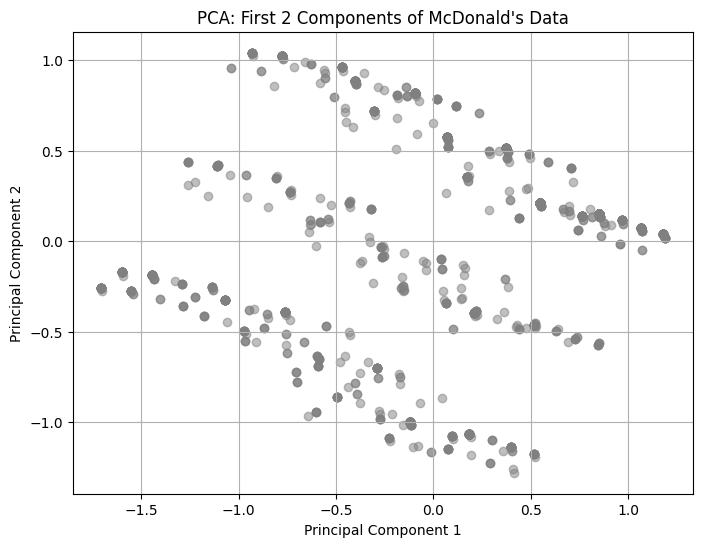

In [7]:
import matplotlib.pyplot as plt

# Plot PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)

plt.title("PCA: First 2 Components of McDonald's Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


***Step 6: Perform K-Means Clustering ***

We apply K-Means clustering with 4 clusters on the binary perception data. Each respondent is assigned to a cluster, and we count how many people fall into each segment.

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Run k-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x_binary)

# Step 2: Get cluster labels (group assignment)
cluster_labels = kmeans.labels_

# Step 3: Count number of people in each cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster sizes:", cluster_sizes)


Cluster sizes: {np.int32(0): np.int64(580), np.int32(1): np.int64(228), np.int32(2): np.int64(322), np.int32(3): np.int64(323)}


**Step 7: Evaluate Clustering Stability Across Different k Values**

We test the stability of K-Means clustering by running it multiple times for each number of clusters (k = 2 to 8) and computing the Adjusted Rand Index (ARI) between runs. A boxplot is generated to visualize how consistent the clustering is for each k — similar to the stability check in R using bootFlexclust.

Running stability check for k = 2
Running stability check for k = 3
Running stability check for k = 4
Running stability check for k = 5
Running stability check for k = 6
Running stability check for k = 7
Running stability check for k = 8


<ipython-input-9-19144f2e001d>:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([stability_scores[k] for k in ks], labels=ks)


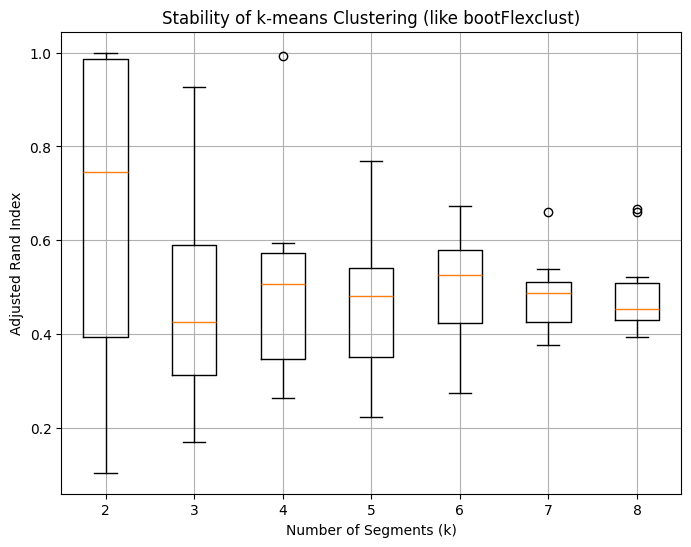

In [9]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np

# Set range of clusters
ks = range(2, 9)
n_runs = 10

# Store ARI values
stability_scores = {k: [] for k in ks}

# Loop over number of clusters
for k in ks:
    print(f"Running stability check for k = {k}")
    # Run clustering multiple times and compare ARI
    for i in range(n_runs):
        km1 = KMeans(n_clusters=k, random_state=i).fit(MD_x_binary)
        km2 = KMeans(n_clusters=k, random_state=i + 100).fit(MD_x_binary)
        score = adjusted_rand_score(km1.labels_, km2.labels_)
        stability_scores[k].append(score)

# Boxplot like the R plot(MD.b28)
plt.figure(figsize=(8, 6))
plt.boxplot([stability_scores[k] for k in ks], labels=ks)
plt.xlabel("Number of Segments (k)")
plt.ylabel("Adjusted Rand Index")
plt.title("Stability of k-means Clustering (like bootFlexclust)")
plt.grid(True)
plt.show()


**Step 8: Assess Cluster Cohesion with Gorge Plot**

We calculate the similarity of each respondent to their own cluster center using an exponential decay of Euclidean distance. Histograms show the distribution of similarity scores within each cluster — helping evaluate how tightly grouped each segment is.

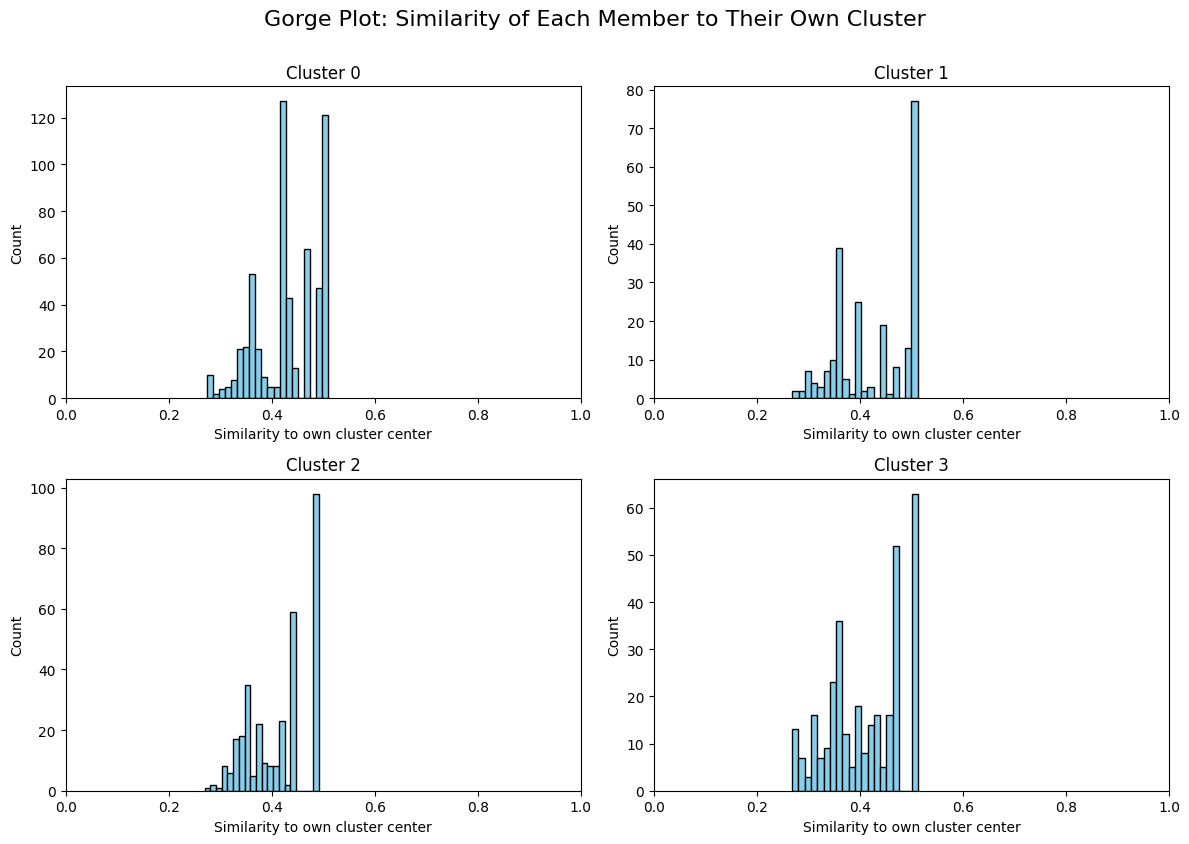

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Step 2: Calculate distances of each point to all centroids
dist_matrix = euclidean_distances(MD_x_binary, centroids)

# Step 3: Compute similarity values
gamma = 1  # same as R default
similarity = np.exp(-gamma * dist_matrix)
similarity = similarity / similarity.sum(axis=1, keepdims=True)

# Step 4: Plot similarity values as histograms for each cluster
plt.figure(figsize=(12, 8))
for cluster in range(4):  # For 4 clusters
    plt.subplot(2, 2, cluster + 1)
    sim_values = similarity[cluster_labels == cluster, cluster]
    plt.hist(sim_values, bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Cluster {cluster}")
    plt.xlabel("Similarity to own cluster center")
    plt.ylabel("Count")
    plt.xlim(0, 1)

plt.tight_layout()
plt.suptitle("Gorge Plot: Similarity of Each Member to Their Own Cluster", fontsize=16, y=1.05)
plt.show()


*** Step 9: Use BIC to Determine Optimal Number of Clusters (Model-Based Clustering)***

We fit Gaussian Mixture Models (GMM) with different numbers of clusters (1 to 8) and evaluate them using the Bayesian Information Criterion (BIC). The plot shows which cluster count has the lowest BIC — indicating the best balance between model fit and complexity.

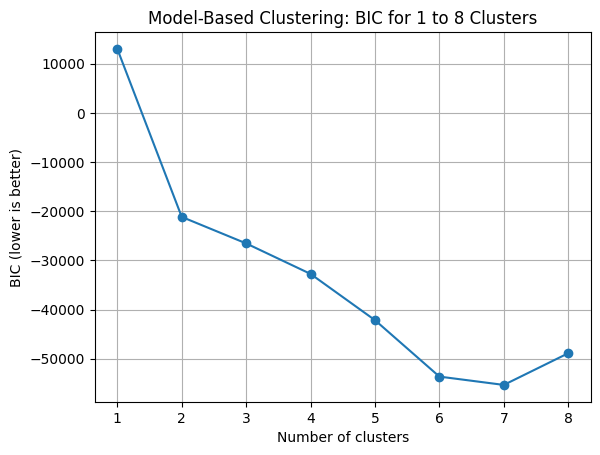

In [12]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Make sure MD_x_binary exists
lowest_bic = np.inf   # ✅ fixed here
bic = []
n_components_range = range(1, 9)
best_gmm = None

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
    gmm.fit(MD_x_binary)
    bic.append(gmm.bic(MD_x_binary))

    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_gmm = gmm

# Plot the BIC values
plt.plot(n_components_range, bic, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("BIC (lower is better)")
plt.title("Model-Based Clustering: BIC for 1 to 8 Clusters")
plt.grid(True)
plt.show()


**Step 10: Compare K-Means and Mixture Model Segment Assignments**

We fit a Gaussian Mixture Model (GMM) using the same number of clusters as K-Means (4), initialized with the K-Means results. Then we compare the segment assignments from both methods using a cross-tabulation to check how closely the models agree.

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Assume MD_x_binary is your binary perception data (first 11 columns)
# cluster_labels is from previous k-means (e.g., kmeans.labels_)

# Step 1: Initialize GMM using k-means labels
gmm = GaussianMixture(n_components=4, random_state=1234, init_params='kmeans')
gmm.fit(MD_x_binary)

# Step 2: Predict new labels from GMM (mixture model)
mixture_labels = gmm.predict(MD_x_binary)

# Step 3: Cross-tabulate k-means and mixture model results
comparison = pd.crosstab(cluster_labels, mixture_labels,
                         rownames=['kmeans'], colnames=['mixture'])

print("Cross-tabulation of k-means and mixture model segments:")
print(comparison)


Cross-tabulation of k-means and mixture model segments:
mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256


**Step 11: Convert 'Like' Text Responses to Numeric Scale**

We map the textual responses in the Like column (e.g., “I love it!+5”, “-3”) to a numeric scale from -5 to +5. This allows us to use the variable in statistical models. We then display frequency tables for both the original and numeric versions of the data — replicating rev(table(mcdonalds$Like)) in R.

In [23]:
# Step 1: Map text ratings to numeric values (-5 to +5)
like_mapping = {
    "I hate it!-5": -5,
    "-4": -4,
    "-3": -3,
    "-2": -2,
    "-1": -1,
    "0": 0,
    "+1": 1,
    "+2": 2,
    "+3": 3,
    "+4": 4,
    "I love it!+5": 5
}

# Step 2: Apply the mapping to create Like.n column
df["Like.n"] = df["Like"].map(like_mapping)

# Step 3: Display reverse frequency table like rev(table(mcdonalds$Like))
print("Reverse frequency table for 'Like':")
print(df["Like"].value_counts().sort_index(ascending=False))

# Step 4: Show frequency table for Like.n (numeric version)
print("\nFrequency table for Like.n:")
print(df["Like.n"].value_counts().sort_index())


Reverse frequency table for 'Like':
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64

Frequency table for Like.n:
Like.n
-5    152
-4     71
-3     73
-2     59
-1     58
 0    169
 1    152
 2    187
 3    229
 4    160
 5    143
Name: count, dtype: int64


*** Step 12: Prepare Data for Linear Regression***

We prepare the dataset for regression by selecting the 11 binary perception variables as predictors and Like.n (numeric preference) as the response. We also print the full regression formula, similar to how it’s displayed in R.

In [24]:
# Step 1: Select the first 11 binary predictor columns
X = df.iloc[:, 0:11]  # Assumes these are 'yummy' to 'disgusting'

# Step 2: Convert Yes/No to 1/0 if needed
X = X.applymap(lambda x: 1 if x == 'Yes' else 0)

# Step 3: Define the dependent variable
y = df["Like.n"]

# Step 4: Print variable names used (like printing the formula)
print("Regression formula variables:")
print("Like.n ~", " + ".join(X.columns))


Regression formula variables:
Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


<ipython-input-24-850a832a731d>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 1 if x == 'Yes' else 0)


**Step 13: Segment Respondents Using Gaussian Mixture Model**

We fit a Gaussian Mixture Model (GMM) with 2 components to segment the data based on the binary perception variables. After predicting segment labels, we print the number of respondents in each segment — similar to reporting cluster sizes in R.

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Reuse X and y from earlier step (X = perceptions, y = Like.n)
X = df.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)
y = df["Like.n"]

# Combine into a full dataset
full_data = pd.concat([X, y], axis=1)

# Fit a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)

# Predict segment labels (0 or 1)
df['Segment'] = gmm.predict(X)

# Print how many in each segment (like cluster sizes in R)
print("Cluster sizes:")
print(df['Segment'].value_counts().sort_index())


Cluster sizes:
Segment
0    545
1    908
Name: count, dtype: int64


<ipython-input-25-657a24422ed1>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = df.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)


**Step 14: Run Separate Regressions for Each Segment**

We fit separate linear regression models within each segment to examine how perception variables influence Like.n. This reveals which attributes most strongly predict liking within each group. We display the regression summary for each segment — similar to running segment-wise models in R.

In [26]:
import statsmodels.api as sm

print("=== Regression Summary for Each Segment ===")
for seg in sorted(df['Segment'].unique()):
    print(f"\nSegment {seg + 1}")

    # Subset data for this segment
    seg_data = df[df['Segment'] == seg].copy()

    # Prepare X and y
    X_seg = seg_data.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)
    y_seg = seg_data['Like.n']

    # Add intercept
    X_seg = sm.add_constant(X_seg)

    # Run regression
    model = sm.OLS(y_seg, X_seg).fit()
    print(model.summary())


=== Regression Summary for Each Segment ===

Segment 1
                            OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     35.77
Date:                Sat, 24 May 2025   Prob (F-statistic):           3.67e-57
Time:                        17:38:06   Log-Likelihood:                -1182.9
No. Observations:                 545   AIC:                             2390.
Df Residuals:                     533   BIC:                             2441.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

<ipython-input-26-5e5d6575179a>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_seg = seg_data.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)
<ipython-input-26-5e5d6575179a>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_seg = seg_data.iloc[:, 0:11].applymap(lambda x: 1 if x == 'Yes' else 0)


                            OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     49.16
Date:                Sat, 24 May 2025   Prob (F-statistic):           2.70e-72
Time:                        17:38:06   Log-Likelihood:                -1801.3
No. Observations:                 908   AIC:                             3623.
Df Residuals:                     898   BIC:                             3671.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yummy          2.3629      0.154     15.316      0.0

**Step 15: Visualize Segment Profiles Using Hierarchical Clustering**

We compute the average “Yes” response for each perception variable across segments and perform hierarchical clustering on the attributes. The result is a horizontal bar chart grouped by similarity, providing a clear visual profile of how each segment perceives McDonald’s.

<ipython-input-28-e8e52e892eb8>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD_x_binary = df[binary_columns].replace({'Yes': 1, 'No': 0})


<Figure size 1000x600 with 0 Axes>

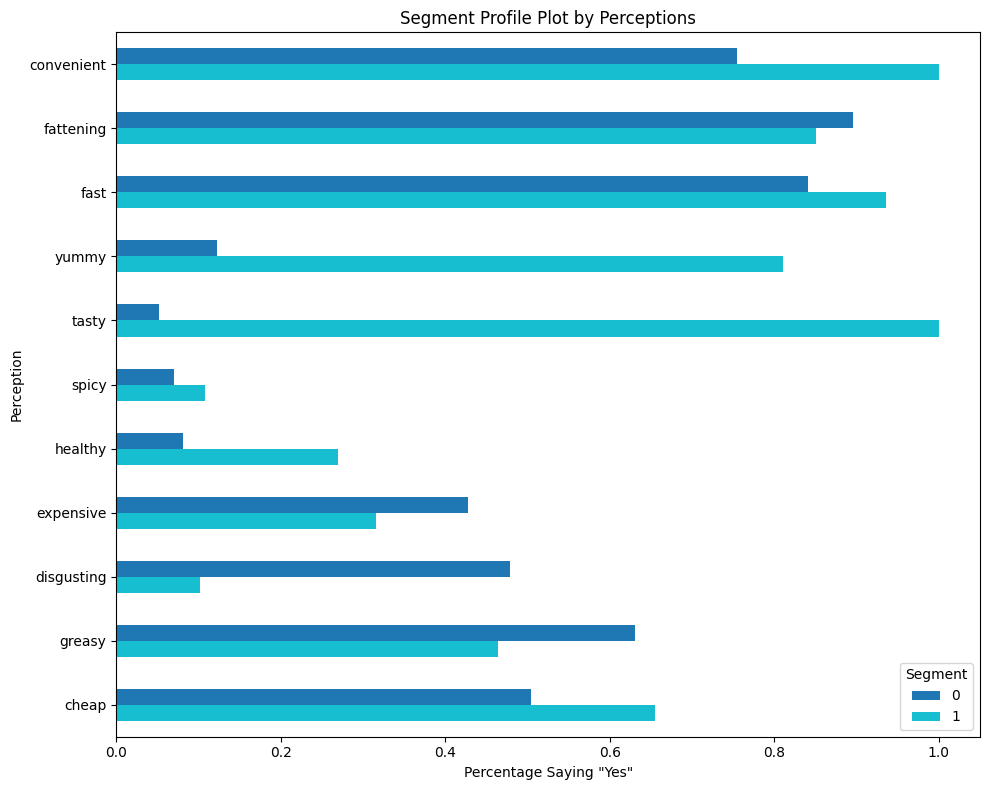

In [28]:
from scipy.cluster.hierarchy import linkage, leaves_list
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert only first 11 columns (Yes/No) to binary 1/0 using .replace
binary_columns = df.columns[:11]
MD_x_binary = df[binary_columns].replace({'Yes': 1, 'No': 0})

# Step 2: Add Segment column (assumed already exists from clustering)
MD_x_binary["Segment"] = df["Segment"]

# Step 3: Compute mean value for each variable per cluster
segment_means = MD_x_binary.groupby("Segment").mean().T

# Step 4: Hierarchical clustering of attributes (rows)
linked = linkage(segment_means.values, method='ward')
ordered_idx = leaves_list(linked)

# Step 5: Reorder variables based on clustering
ordered_vars = segment_means.index[ordered_idx]
ordered_data = segment_means.loc[ordered_vars]

# Step 6: Plot segment profile (like barchart in R)
plt.figure(figsize=(10, 6))
ordered_data.plot(kind='barh', figsize=(10, 8), colormap='tab10')
plt.title('Segment Profile Plot by Perceptions')
plt.xlabel('Percentage Saying "Yes"')
plt.ylabel('Perception')
plt.legend(title='Segment')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Step 16: PCA Biplot with Segment Clusters and Attribute Loadings**

We visualize respondents in PCA space and color them by segment. Arrows indicate the direction and strength of each perception variable’s contribution to the principal components — replicating the projAxes functionality in R. This helps interpret how perceptions align with segment positioning.

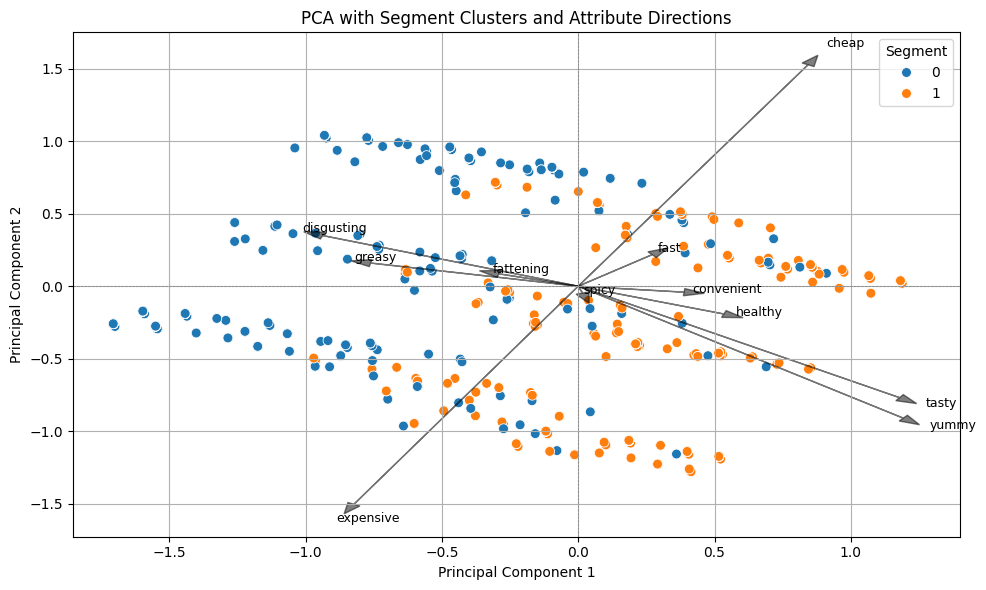

In [30]:
# Step 5: Add arrows showing variable loadings (like projAxes in R)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=MD_x_binary.columns)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Segment', palette='tab10', s=50)
plt.title('PCA with Segment Clusters and Attribute Directions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Plot loading arrows
for i in loadings.index:
    plt.arrow(0, 0,
              loadings.loc[i, 'PC1'] * 2.5,
              loadings.loc[i, 'PC2'] * 2.5,
              color='black', alpha=0.5, head_width=0.05)
    plt.text(loadings.loc[i, 'PC1'] * 2.7,
             loadings.loc[i, 'PC2'] * 2.7,
             i, fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.legend(title='Segment')
plt.show()


*** Step 17: Mosaic Plot of Segments vs. Liking Score***

We create a mosaic plot to visualize how different segments vary in their Like.n ratings. This helps identify preference patterns across segments, similar to the mosaic plots used in the R case study for segment interpretation.

<Figure size 1200x600 with 0 Axes>

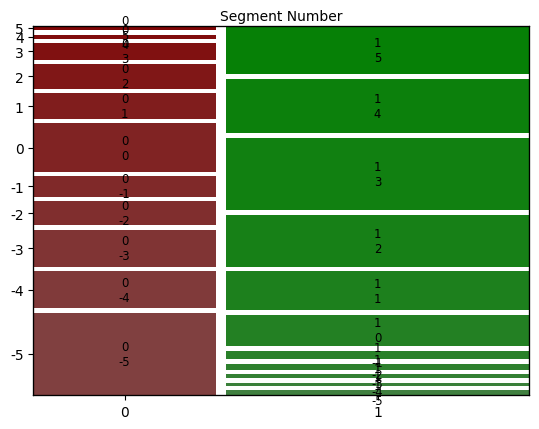

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming df is your main DataFrame and 'Segment' column is already created.
# Cross-tabulate segment number and Like
like_segment_ct = pd.crosstab(df['Segment'], df['Like.n'])

# Convert to format suitable for mosaicplot
mosaic_data = like_segment_ct.stack()

# Plot mosaic chart
plt.figure(figsize=(12, 6))
mosaic(mosaic_data, title='', gap=0.02)
plt.xlabel("Segment Number")
plt.ylabel("Like Score")
plt.show()


*** Step 18: Mosaic Plot of Segments vs. Gender***

 We use a mosaic plot to visualize the distribution of gender within each segment. This helps reveal gender-based differences in segment composition, similar to how it’s analyzed in the original R case study.

<Figure size 1000x600 with 0 Axes>

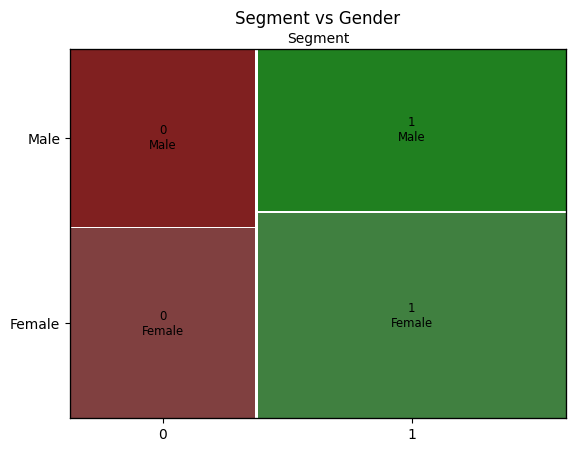

In [32]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Cross-tabulate Segment and Gender
cross_tab_gender = pd.crosstab(df['Segment'], df['Gender'])

# Plot mosaic plot
plt.figure(figsize=(10, 6))
mosaic(cross_tab_gender.stack(), title='Segment vs Gender')
plt.xlabel('Segment')
plt.ylabel('Gender')
plt.show()


**Step 19: Boxplot of Age by Segment**

We create a boxplot to compare the age distribution across segments. This visualization highlights how age varies between customer segments and may reveal trends such as younger or older groups favoring certain perceptions of McDonald's.

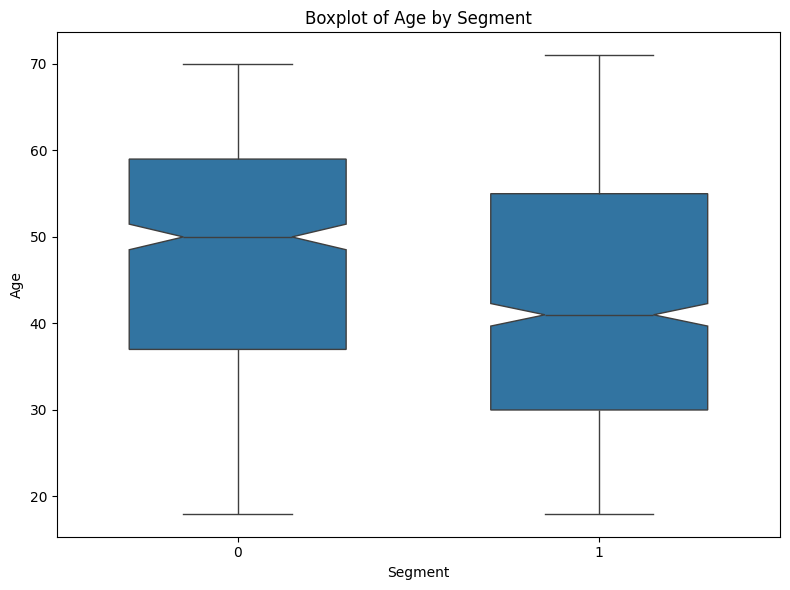

In [33]:
import seaborn as sns

# Boxplot of Age per Segment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Age', data=df, width=0.6, notch=True)
plt.title('Boxplot of Age by Segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


**Step 20: Segment Evaluation Plot (Bubble Chart)**

We replicate the R-style evaluation plot by plotting the average Visit Frequency vs. average Like score for each segment. Bubble size represents the proportion of female respondents in each segment. This visual helps in comparing and selecting target segments based on size, preference, and gender distribution — matching Figure A.13 from the book.

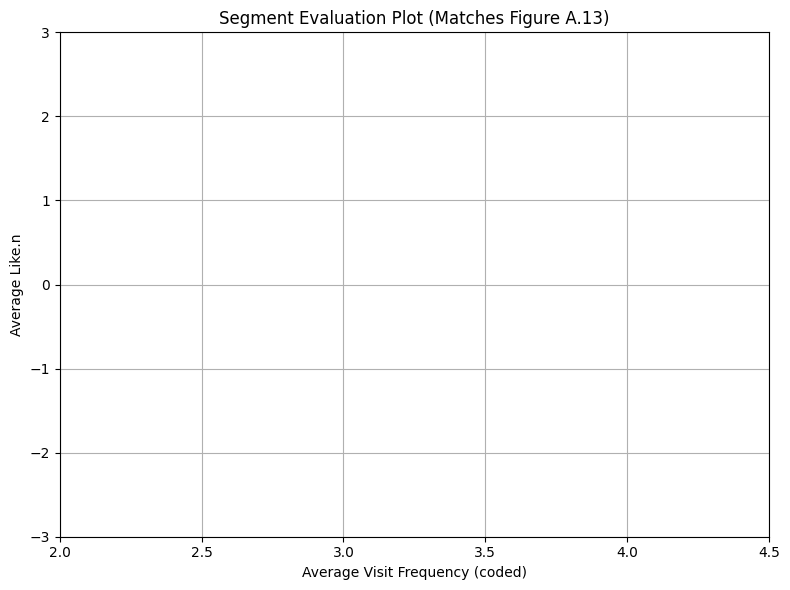

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# STEP 1: Manually encode VisitFrequency to match R’s order
visit_map = {
    'Every three months': 1,
    'Once a month': 2,
    'Every two weeks': 3,
    'Once a week': 4,
    'Several times a week': 5,
    'Daily': 6
}
df['VisitFreq_num'] = df['VisitFrequency'].map(visit_map)

# STEP 2: Calculate mean VisitFrequency, Like.n, and %Female per Segment
visit = df.groupby('Segment')['VisitFreq_num'].mean()
like = df.groupby('Segment')['Like.n'].mean()
female = df.groupby('Segment')['Gender'].apply(lambda x: (x == 'Female').mean())

# STEP 3: Plot bubble chart (same xlim/ylim, size = female % like R’s cex = 10 * female)
plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=10 * female * 100, alpha=0.5, color='lightblue', edgecolors='black')

# STEP 4: Label each point with Segment number (1-indexed to match R)
for i in range(len(visit)):
    plt.text(visit.iloc[i], like.iloc[i], str(i + 1), fontsize=12, ha='center', va='center', weight='bold')

# STEP 5: Match axis limits from R code
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel("Average Visit Frequency (coded)")
plt.ylabel("Average Like.n")
plt.title("Segment Evaluation Plot (Matches Figure A.13)")
plt.grid(True)
plt.tight_layout()
plt.show()
